In [146]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as  ET

In [147]:
cnx = sqlite3.connect('database.sqlite')
Country = pd.read_sql_query("SELECT * FROM Country", cnx)
League = pd.read_sql_query("SELECT * FROM League", cnx)
Match = pd.read_sql_query("SELECT * FROM Match", cnx)
Player = pd.read_sql_query("SELECT * FROM Player", cnx)
Player_Attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
Team = pd.read_sql_query("SELECT * FROM Team", cnx)
Team_Attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

In [148]:
print("Country")
print(Country.shape)
print(Country.columns)
print("-"*100)

print("League")
print(League.shape)
print(League.columns)
print("-"*100)

print("Match")
print(Match.shape)
print(Match.columns)
print("-"*100)

print("Player")
print(Player.shape)
print(Player.columns)

print("Player_Attributes")
print(Player_Attributes.shape)
print(Player_Attributes.columns)
print("-"*100)

print("Team")
print(Team.shape)
print(Team.columns)
print("-"*100)

print("Team_Attributes")
print(Team_Attributes.shape)
print(Team_Attributes.columns)
print("-"*100)

Country
(11, 2)
Index(['id', 'name'], dtype='object')
----------------------------------------------------------------------------------------------------
League
(11, 3)
Index(['id', 'country_id', 'name'], dtype='object')
----------------------------------------------------------------------------------------------------
Match
(25979, 115)
Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)
----------------------------------------------------------------------------------------------------
Player
(11060, 7)
Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')
Player_Attributes
(183978, 42)
Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'pr

In [149]:
pd.set_option('display.max_columns', None)
Match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## EPL Data

In [150]:
EPL = Match[Match['league_id']==1729]
#set(EPL['BWH'].isnull())
(EPL['BWH'].isnull()).value_counts()

False    3039
True        1
Name: BWH, dtype: int64

In [151]:
missings = EPL.isna().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', missings.shape[0]):
    print(missings)

id                     0
country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
home_player_X1         0
home_player_X2         0
home_player_X3         0
home_player_X4         0
home_player_X5         0
home_player_X6         0
home_player_X7         0
home_player_X8         0
home_player_X9         0
home_player_X10        0
home_player_X11        0
away_player_X1         0
away_player_X2         0
away_player_X3         0
away_player_X4         0
away_player_X5         0
away_player_X6         0
away_player_X7         0
away_player_X8         0
away_player_X9         0
away_player_X10        0
away_player_X11        0
home_player_Y1         0
home_player_Y2         0
home_player_Y3         0
home_player_Y4         0
home_player_Y5         0
home_player_Y6         0
home_player_Y7         0


## Get rid of coordinates columns

In [152]:
x = EPL.iloc[:,:11]
y  = EPL.iloc[:,55:]
EPL_1 = pd.concat([x,y], axis = 1)

In [153]:
pd.set_option('display.max_columns', None)
EPL_1

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,24157.0,30829.0,24224.0,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,NaN,NaN,NaN,1.25,4.50,10.00,1.25,5.00,10.00,1.28,5.5,12.00,1.30,4.75,10.0,1.29,4.50,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,39297.0,26181.0,30960.0,36410.0,36373.0,36832.0,23115.0,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.5,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,NaN,NaN,NaN,1.17,5.50,12.00,1.20,5.50,12.00,1.25,6.0,13.00,1.22,5.50,13.0,1.22,5.00,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,17866.0,30352.0,23927.0,24410.0,30660.0,37442.0,30617.0,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,5.50,3.6,1.67,5.00,3.35,1.67,4.50,3.50,1.65,4.50,3.30,1.67,NaN,NaN,NaN,5.50,3.30,1.57,4.33,3.40,1.73,5.50,3.8,1.65,5.00,3.40,1.7,4.50,3.40,1.73
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,24223.0,24773.0,34543.0,23139.0,34421.0,34987.0,35472.0,111865.0,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1.91,3.4,4.20,1.90,3.20,3.80,1.80,3.30,3.80,1.80,3.20,4.00,NaN,NaN,NaN,1.83,3.20,3.75,1.91,3.25,3.75,1.90,3.5,4.35,1.91,3.25,4.0,1.91,3.25,3.80
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,30380.0,30357.0,24658.0,43280.0,23282.0,38609.0,24780.0,23782.0,23354.0,23264.0,26165.0,31432.0,46403.0,24208.0,23939.0,33963.0,47413.0,40198.0,42119.0,NaN,

In [154]:
k= EPL.isna().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', k.shape[0]):
    print(k)

id                     0
country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
home_player_X1         0
home_player_X2         0
home_player_X3         0
home_player_X4         0
home_player_X5         0
home_player_X6         0
home_player_X7         0
home_player_X8         0
home_player_X9         0
home_player_X10        0
home_player_X11        0
away_player_X1         0
away_player_X2         0
away_player_X3         0
away_player_X4         0
away_player_X5         0
away_player_X6         0
away_player_X7         0
away_player_X8         0
away_player_X9         0
away_player_X10        0
away_player_X11        0
home_player_Y1         0
home_player_Y2         0
home_player_Y3         0
home_player_Y4         0
home_player_Y5         0
home_player_Y6         0
home_player_Y7         0


## Drop some 'bet odds' columns that contains many missing values

In [155]:
EPL_1.drop(['PSH', 'PSD', 'PSA', 'SJH', 'SJD', 'SJA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'], axis = 1, inplace = True)
EPL_1

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,24157.0,30829.0,24224.0,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,1.25,4.50,10.00,1.28,5.5,12.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,39297.0,26181.0,30960.0,36410.0,36373.0,36832.0,23115.0,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.5,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,1.17,5.50,12.00,1.25,6.0,13.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,17866.0,30352.0,23927.0,24410.0,30660.0,37442.0,30617.0,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,5.50,3.6,1.67,5.00,3.35,1.67,4.50,3.50,1.65,4.50,3.30,1.67,5.50,3.30,1.57,5.50,3.8,1.65
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,24223.0,24773.0,34543.0,23139.0,34421.0,34987.0,35472.0,111865.0,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1.91,3.4,4.20,1.90,3.20,3.80,1.80,3.30,3.80,1.80,3.20,4.00,1.83,3.20,3.75,1.90,3.5,4.35
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,30380.0,30357.0,24658.0,43280.0,23282.0,38609.0,24780.0,23782.0,23354.0,23264.0,26165.0,31432.0,46403.0,24208.0,23939.0,33963.0,47413.0,40198.0,42119.0,NaN,33633.0,107216.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><val

In [156]:
EPL_1['date'] = pd.to_datetime(EPL_1['date'])
EPL_1['year'] = EPL_1['date'].apply(lambda x: x.year)

In [157]:
EPL_1['year'].value_counts()

2012    391
2015    380
2014    380
2009    378
2011    377
2010    374
2013    372
2008    198
2016    190
Name: year, dtype: int64

In [158]:
EPL_1.iloc[0,22:33]

away_player_1     24224
away_player_2     25518
away_player_3     24228
away_player_4     30929
away_player_5     29581
away_player_6     38807
away_player_7     40565
away_player_8     30360
away_player_9     33852
away_player_10    34574
away_player_11    37799
Name: 1728, dtype: object

## Add 'starplayer' column

#### -Make a new table

In [159]:
# Merge the player and player_attribute data
df = Player.merge(Player_Attributes, how='inner', on='player_api_id')

# Calculate the age of the players
df['birthday'] = pd.to_datetime(df['birthday'])
df['date'] = pd.to_datetime(df['date'])
df['age'] = df['date'] - df['birthday']

# Drop unnecessary columns
df.drop(['id_x', 'id_y', 'player_fifa_api_id_x', 'player_fifa_api_id_y'], 1, inplace=True)
ratings_df = df[['player_api_id', 'player_name', 'age', 'height', 'weight', 'date',
                 'overall_rating', 'potential']]

# Drop players without any rating
ratings_df = ratings_df.drop(ratings_df[ratings_df['overall_rating'].isnull()].index)

# Sorting by rating rather than age
# I will later group by the year and want to have the highest rating per player when I
# remove the duplicate players within each year
ratings_df.sort_values(['player_name', 'player_api_id', 'overall_rating',
                        'potential'], ascending=[True, True, False, False], inplace=True)

# Change the date to just the year
ratings_df['date'] = ratings_df['date'].apply(lambda x: x.year)

In [160]:
df_2007=ratings_df[ratings_df['date']==2007]
df_2008=ratings_df[ratings_df['date']==2008]
df_2009=ratings_df[ratings_df['date']==2009]
df_2010=ratings_df[ratings_df['date']==2010]
df_2011=ratings_df[ratings_df['date']==2011]
df_2012=ratings_df[ratings_df['date']==2012]
df_2013=ratings_df[ratings_df['date']==2013]
df_2014=ratings_df[ratings_df['date']==2014]
df_2015=ratings_df[ratings_df['date']==2015]
df_2016=ratings_df[ratings_df['date']==2016]

In [161]:
df_2007

,player_api_id,player_name,age,height,weight,date,overall_rating,potential
4,505942,Aaron Appindangoye,5472 days,182.88,187,2007,61.0,65.0
37,155782,Aaron Cresswell,6278 days,170.18,146,2007,53.0,60.0
63,162549,Aaron Doran,5764 days,170.18,163,2007,59.0,70.0
85,30572,Aaron Galindo,9245 days,182.88,198,2007,71.0,78.0
86,30572,Aaron Galindo,9056 days,182.88,198,2007,71.0,78.0
...,...,...,...,...,...,...,...,...
183977,39902,Zvjezdan Misimovic,9028 days,180.34,176,2007,80.0,81.0
183976,39902,Zvjezdan Misimovic,9217 days,180.34,176,2007,78.0,81.0
41624,11833,de Oliveira Cleber Monteiro,9960 days,182.88,170,2007,67.0,67.0
41625,11833,de Oliveira Cleber Monteiro,9771 days,182.88,170,2007,67.0,67.0


In [162]:
df_2007 = df_2007.drop_duplicates(['player_api_id'], keep = 'first')
df_2007['rating_rank'] = df_2007['overall_rating'].rank(ascending=False)
df_2007 = df_2007.sort_values('rating_rank')
df_2007 = df_2007.iloc[:20,:]

df_2008 = df_2008.drop_duplicates(['player_api_id'], keep = 'first')
df_2008['rating_rank'] = df_2008['overall_rating'].rank(ascending=False)
df_2008 = df_2008.sort_values('rating_rank')
df_2008 = df_2008.iloc[:20,:]

df_2009 = df_2009.drop_duplicates(['player_api_id'], keep = 'first')
df_2009['rating_rank'] = df_2009['overall_rating'].rank(ascending=False)
df_2009 = df_2009.sort_values('rating_rank')
df_2009 = df_2009.iloc[:20,:]

df_2010 = df_2010.drop_duplicates(['player_api_id'], keep = 'first')
df_2010['rating_rank'] = df_2010['overall_rating'].rank(ascending=False)
df_2010 = df_2010.sort_values('rating_rank')
df_2010 = df_2010.iloc[:20,:]

df_2011 = df_2011.drop_duplicates(['player_api_id'], keep = 'first')
df_2011['rating_rank'] = df_2011['overall_rating'].rank(ascending=False)
df_2011 = df_2011.sort_values('rating_rank')
df_2011 = df_2011.iloc[:20,:]

df_2012 = df_2012.drop_duplicates(['player_api_id'], keep = 'first')
df_2012['rating_rank'] = df_2012['overall_rating'].rank(ascending=False)
df_2012 = df_2012.sort_values('rating_rank')
df_2012 = df_2012.iloc[:20,:]

df_2013 = df_2013.drop_duplicates(['player_api_id'], keep = 'first')
df_2013['rating_rank'] = df_2013['overall_rating'].rank(ascending=False)
df_2013 = df_2013.sort_values('rating_rank')
df_2013 = df_2013.iloc[:20,:]

df_2014 = df_2014.drop_duplicates(['player_api_id'], keep = 'first')
df_2014['rating_rank'] = df_2014['overall_rating'].rank(ascending=False)
df_2014 = df_2014.sort_values('rating_rank')
df_2014 = df_2014.iloc[:20,:]

df_2015 = df_2015.drop_duplicates(['player_api_id'], keep = 'first')
df_2015['rating_rank'] = df_2015['overall_rating'].rank(ascending=False)
df_2015 = df_2015.sort_values('rating_rank')
df_2015 = df_2015.iloc[:20,:]

df_2016 = df_2016.drop_duplicates(['player_api_id'], keep = 'first')
df_2016['rating_rank'] = df_2016['overall_rating'].rank(ascending=False)
df_2016 = df_2016.sort_values('rating_rank')
df_2016 = df_2016.iloc[:20,:]

<ipython-input-162-b3b837c45baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2007['rating_rank'] = df_2007['overall_rating'].rank(ascending=False)


In [163]:
Top20Rank = pd.concat([df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016])

In [164]:
Top20Rank

,player_api_id,player_name,age,height,weight,date,overall_rating,potential,rating_rank
63875,30717,Gianluigi Buffon,10617 days,193.04,201,2007,93.0,93.0,1.5
178975,30829,Wayne Rooney,7791 days,175.26,183,2007,93.0,93.0,1.5
66757,39989,Gregory Coupet,12471 days,180.34,176,2007,92.0,93.0,3.0
153453,30743,Ronaldinho,9834 days,182.88,168,2007,91.0,95.0,6.5
33353,30893,Cristiano Ronaldo,8241 days,185.42,176,2007,91.0,94.0,6.5
...,...,...,...,...,...,...,...,...,...
26301,38817,Carlos Tevez,11666 days,172.72,157,2016,86.0,86.0,23.5
8485,50047,Alexis Sanchez,9950 days,170.18,137,2016,86.0,87.0,23.5
40428,37459,David Silva,11026 days,170.18,148,2016,86.0,86.0,23.5
140347,248453,Paul Pogba,8459 days,190.50,185,2016,86.0,91.0,23.5


#### -Add a column!

In [165]:
EPL_1['starplayer'] = ['Home' if (Top20Rank[Top20Rank['date']==EPL_1['year'][i+1728]]['player_api_id'].isin(EPL_1.iloc[i,11:22])).any() == True 
                       else 'Away' if (Top20Rank[Top20Rank['date']==EPL_1['year'][i+1728]]['player_api_id'].isin(EPL_1.iloc[i,22:33])).any() == True
                       else 'No' for i in range(3040)]

In [166]:
EPL_1['starplayer'].value_counts()

No      2188
Home     455
Away     397
Name: starplayer, dtype: int64

In [167]:
(Top20Rank[Top20Rank['date']==EPL_1['year'][1728]]['player_api_id'].isin(EPL_1.iloc[0,11:33])).any()

False

In [168]:
EPL_1

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,starplayer
1728,1729,1729,1729,2008/2009,1,2008-08-17,489042,10260,10261,1,1,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,24157.0,30829.0,24224.0,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,1.25,4.50,10.00,1.28,5.5,12.00,2008,No
1729,1730,1729,1729,2008/2009,1,2008-08-16,489043,9825,8659,1,0,23686.0,26111.0,38835.0,30986.0,31291.0,31013.0,30935.0,39297.0,26181.0,30960.0,36410.0,36373.0,36832.0,23115.0,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.5,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,1.17,5.50,12.00,1.25,6.0,13.00,2008,Home
1730,1731,1729,1729,2008/2009,1,2008-08-16,489044,8472,8650,0,1,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,17866.0,30352.0,23927.0,24410.0,30660.0,37442.0,30617.0,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,5.50,3.6,1.67,5.00,3.35,1.67,4.50,3.50,1.65,4.50,3.30,1.67,5.50,3.30,1.57,5.50,3.8,1.65,2008,Away
1731,1732,1729,1729,2008/2009,1,2008-08-16,489045,8654,8528,2,1,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,24223.0,24773.0,34543.0,23139.0,34421.0,34987.0,35472.0,111865.0,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1.91,3.4,4.20,1.90,3.20,3.80,1.80,3.30,3.80,1.80,3.20,4.00,1.83,3.20,3.75,1.90,3.5,4.35,2008,No
1732,1733,1729,1729,2008/2009,1,2008-08-17,489046,10252,8456,4,2,30380.0,30357.0,24658.0,43280.0,23282.0,38609.0,24780.0,23782.0,23354.0,23264.0,26165.0,31432.0,46403.0,24208.0,23939.0,33963.0,47413.0,40198.0,42119.0,NaN,33633.0,107216.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cro

## Drop players data in EPL match data

In [169]:
m = EPL_1.iloc[:,:11]
n = EPL_1.iloc[:,33:]

In [170]:
EPL_2 = pd.concat([m,n], axis=1)

In [171]:
EPL_2.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,starplayer
1728,1729,1729,1729,2008/2009,1,2008-08-17,489042,10260,10261,1,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.00,1.30,4.75,8.25,1.3,4.4,8.50,1.25,4.5,10.00,1.25,4.5,10.00,1.28,5.5,12.00,2008,No
1729,1730,1729,1729,2008/2009,1,2008-08-16,489043,9825,8659,1,0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.5,15.00,1.22,5.50,10.00,1.2,5.2,11.00,1.20,5.0,11.00,1.17,5.5,12.00,1.25,6.0,13.00,2008,Home
1730,1731,1729,1729,2008/2009,1,2008-08-16,489044,8472,8650,0,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,5.50,3.6,1.67,5.00,3.35,1.67,4.5,3.5,1.65,4.50,3.3,1.67,5.50,3.3,1.57,5.50,3.8,1.65,2008,Away
1731,1732,1729,1729,2008/2009,1,2008-08-16,489045,8654,8528,2,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1.91,3.4,4.20,1.90,3.20,3.80,1.8,3.3,3.80,1.80,3.2,4.00,1.83,3.2,3.75,1.90,3.5,4.35,2008,No
1732,1733,1729,1729,2008/2009,1,2008-08-17,489046,10252,8456,4,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,1.91,3.4,4.33,1.95,3.20,3.60,2.0,3.2,3.30,1.83,3.2,3.75,1.91,3.2,3.50,1.90,3.5,4.35,2008,No


## So, current EPL data?

In [172]:
EPL_2.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,starplayer
1728,1729,1729,1729,2008/2009,1,2008-08-17,489042,10260,10261,1,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.00,1.30,4.75,8.25,1.3,4.4,8.50,1.25,4.5,10.00,1.25,4.5,10.00,1.28,5.5,12.00,2008,No
1729,1730,1729,1729,2008/2009,1,2008-08-16,489043,9825,8659,1,0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.5,15.00,1.22,5.50,10.00,1.2,5.2,11.00,1.20,5.0,11.00,1.17,5.5,12.00,1.25,6.0,13.00,2008,Home
1730,1731,1729,1729,2008/2009,1,2008-08-16,489044,8472,8650,0,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,5.50,3.6,1.67,5.00,3.35,1.67,4.5,3.5,1.65,4.50,3.3,1.67,5.50,3.3,1.57,5.50,3.8,1.65,2008,Away
1731,1732,1729,1729,2008/2009,1,2008-08-16,489045,8654,8528,2,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1.91,3.4,4.20,1.90,3.20,3.80,1.8,3.3,3.80,1.80,3.2,4.00,1.83,3.2,3.75,1.90,3.5,4.35,2008,No
1732,1733,1729,1729,2008/2009,1,2008-08-17,489046,10252,8456,4,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,1.91,3.4,4.33,1.95,3.20,3.60,2.0,3.2,3.30,1.83,3.2,3.75,1.91,3.2,3.50,1.90,3.5,4.35,2008,No


## XML parsing,,,

In [173]:
##make a copy

In [174]:
EPL_XML = EPL_2.copy()

In [175]:
def calculate_stats_both_teams(xml_document, home_team, away_team, card_type='y'):
    assert card_type == 'y' or card_type == 'r', "Please enter either y or r"
    tree = ET.fromstring(xml_document)
    stat_home_team = 0
    stat_away_team = 0
    
    #Dealing with card type using the root element & the card type argument
    if tree.tag == 'card':
        for child in tree.iter('value'):
            #Some xml docs have no card_type element in the tree. comment section seems to have that information
            try:
                if child.find('comment').text == card_type:
                    if int(child.find('team').text) == home_team:
                        stat_home_team += 1
                    else:
                        stat_away_team += 1
            except AttributeError:
                #Some values in the xml doc don't have team values, so there isn't much we can do at this stage
                pass
                
        return stat_home_team, stat_away_team
    
    #Lets take the last possession stat which is available from the xml doc
    if tree.tag == 'possession':
        try:
            last_value = [child for child in tree.iter('value')][-1]
            return int(last_value.find('homepos').text), int(last_value.find('awaypos').text)
        except:
            return None, None
    
    #Taking care of all other stats by extracting based on the home team & away team api id's
    for team in [int(stat.text) for stat in tree.findall('value/team')]:
        if team == home_team: 
            stat_home_team += 1
        else:
            stat_away_team += 1
    return stat_home_team, stat_away_team

In [176]:
EPL_XML[['on_target_shot_home_team','on_target_shot_away_team']] = EPL_XML[['shoton','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['shoton'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
EPL_XML[['off_target_shot_home_team','off_target_shot_away_team']] = EPL_XML[['shotoff','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['shotoff'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand") 
EPL_XML[['foul_home_team','foul_away_team']] = EPL_XML[['foulcommit','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['foulcommit'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
EPL_XML[['yellow_card_home_team','yellow_card_away_team']] = EPL_XML[['card','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['card'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")
EPL_XML[['red_card_home_team','red_card_away_team']] = EPL_XML[['card','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['card'],x['home_team_api_id'],x['away_team_api_id'], card_type='r'), axis = 1,result_type="expand")  
EPL_XML[['crosses_home_team','crosses_away_team']] = EPL_XML[['cross','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['cross'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
EPL_XML[['corner_home_team','corner_away_team']] = EPL_XML[['corner','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['corner'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")  
EPL_XML[['possession_home_team','possession_away_team']] = EPL_XML[['possession','home_team_api_id','away_team_api_id']].apply(lambda x: calculate_stats_both_teams(x['possession'],x['home_team_api_id'],x['away_team_api_id']), axis = 1,result_type="expand")

In [177]:
pd.set_option('display.max_columns', None)
EPL_XML

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,starplayer,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team
1728,1729,1729,1729,2008/2009,1,2008-08-17,489042,10260,10261,1,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.29,5.5,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,1.25,4.50,10.00,1.28,5.5,12.00,2008,No,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0
1729,1730,1729,1729,2008/2009,1,2008-08-16,489043,9825,8659,1,0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,1.20,6.5,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,1.17,5.50,12.00,1.25,6.0,13.00,2008,Home,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0
1730,1731,1729,1729,2008/2009,1,2008-08-16,489044,8472,8650,0,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,5.50,3.6,1.67,5.00,3.35,1.67,4.50,3.50,1.65,4.50,3.30,1.67,5.50,3.30,1.57,5.50,3.8,1.65,2008,Away,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0
1731,1732,1729,1729,2008/2009,1,2008-08-16,489045,8654,8528,2,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,1.91,3.4,4.20,1.90,3.20,3.80,1.80,3.30,3.80,1.80,3.20,4.00,1.83,3.20,3.75,1.90,3.5,4.35,2008,No,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0
1732,1733,1729,1729,2008/2009,1,2008-08-17,489046,10252,8456,4,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,1.91,3.4,4.33,1.95,3.20,3.60,2.00,3.20,3.30,1.83,3.20,3.75,1.91,3.20,3.50,1.90,3.5,4.35,2008,No,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,4764,1729,1729,2015/2016,9,2015-10-17,1988795,8466,8197,2,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stat

In [178]:
EPL_XML['home_outcome'] = ['Win' if EPL_XML['home_team_goal'][1728+i] > EPL_XML['away_team_goal'][1728+i] else 'Not Win' for i in range(3040)]

In [179]:
EPL_XML.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,starplayer,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome
4763,4764,1729,1729,2015/2016,9,2015-10-17,1988795,8466,8197,2,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>54</comment><stats...,1.75,4.0,5.00,1.75,3.70,4.40,1.80,3.50,4.20,1.75,3.75,5.00,1.80,3.25,5.00,1.75,3.9,5.0,2015,No,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,Not Win
4764,4765,1729,1729,2015/2016,9,2015-10-19,1988796,10003,10194,0,1,<goal><value><comment>p</comment><stats><penal...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>53</comment><stats...,2.05,3.4,4.20,2.05,3.20,3.75,2.00,3.30,3.60,2.05,3.40,4.00,2.05,3.10,4.00,2.05,3.4,4.1,2015,No,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,Not Win
4765,4766,1729,1729,2015/2016,9,2015-10-17,1988797,8586,8650,0,0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><stats...,2.50,3.5,3.00,2.50,3.20,2.95,2.50,3.20,2.75,2.40,3.40,2.88,2.50,3.30,3.00,2.45,3.5,3.0,2015,No,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,Not Win
4766,4767,1729,1729,2015/2016,9,2015-10-17,1988798,9817,9825,0,3,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>39</comment><stats...,6.00,4.2,1.62,5.00,4.10,1.60,5.00,3.90,1.60,6.00,4.00,1.62,6.00,3.60,1.62,6.25,4.2,1.6,2015,No,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,Not Win
4767,4768,1729,1729,2015/2016,9,2015-10-17,1988799,8659,8472,1,0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><stats...,2.05,3.4,4.20,2.05,3.25,3.60,1.85,3.45,4.00,2.05,3.25,4.20,2.10,3.00,4.00,2.05,3.3,4.2,2015,No,4,4,4,4,13,13,2,2,0,0,25,18,1,5,57.0,43.0,Win


## Final!

In [180]:
myEPL = EPL_XML.drop(['id', 'date', 'country_id', 'league_id', 'season', 'match_api_id', 'home_team_api_id', 'away_team_api_id'
                     , 'home_team_goal', 'away_team_goal', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'], axis=1)

In [181]:
myEPL = myEPL.dropna(axis=0)
myEPL.isna().sum()

stage                        0
B365H                        0
B365D                        0
B365A                        0
BWH                          0
BWD                          0
BWA                          0
IWH                          0
IWD                          0
IWA                          0
LBH                          0
LBD                          0
LBA                          0
WHH                          0
WHD                          0
WHA                          0
VCH                          0
VCD                          0
VCA                          0
year                         0
starplayer                   0
on_target_shot_home_team     0
on_target_shot_away_team     0
off_target_shot_home_team    0
off_target_shot_away_team    0
foul_home_team               0
foul_away_team               0
yellow_card_home_team        0
yellow_card_away_team        0
red_card_home_team           0
red_card_away_team           0
crosses_home_team            0
crosses_

In [182]:
myEPL

,stage,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,starplayer,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome
1728,1,1.29,5.5,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,1.25,4.50,10.00,1.28,5.5,12.00,2008,No,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,Not Win
1729,1,1.20,6.5,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,1.17,5.50,12.00,1.25,6.0,13.00,2008,Home,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,Win
1730,1,5.50,3.6,1.67,5.00,3.35,1.67,4.50,3.50,1.65,4.50,3.30,1.67,5.50,3.30,1.57,5.50,3.8,1.65,2008,Away,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,Not Win
1731,1,1.91,3.4,4.20,1.90,3.20,3.80,1.80,3.30,3.80,1.80,3.20,4.00,1.83,3.20,3.75,1.90,3.5,4.35,2008,No,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,Win
1732,1,1.91,3.4,4.33,1.95,3.20,3.60,2.00,3.20,3.30,1.83,3.20,3.75,1.91,3.20,3.50,1.90,3.5,4.35,2008,No,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,9,1.75,4.0,5.00,1.75,3.70,4.40,1.80,3.50,4.20,1.75,3.75,5.00,1.80,3.25,5.00,1.75,3.9,5.00,2015,No,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,Not Win
4764,9,2.05,3.4,4.20,2.05,3.20,3.75,2.00,3.30,3.60,2.05,3.40,4.00,2.05,3.10,4.00,2.05,3.4,4.10,2015,No,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,Not Win
4765,9,2.50,3.5,3.00,2.50,3.20,2.95,2.50,3.20,2.75,2.40,3.40,2.88,2.50,3.30,3.00,2.45,3.5,3.00,2015,No,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,Not Win
4766,9,6.00,4.2,1.62,5.00,4.10,1.60,5.00,3.90,1.60,6.00,4.00,1.62,6.00,3.60,1.62,6.25,4.2,1.60,2015,No,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,Not Win


In [183]:
myEPL['starplayer'] = myEPL['starplayer'].astype('category')

In [184]:
myEPL

,stage,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,starplayer,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome
1728,1,1.29,5.5,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,1.25,4.50,10.00,1.28,5.5,12.00,2008,No,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,Not Win
1729,1,1.20,6.5,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,1.17,5.50,12.00,1.25,6.0,13.00,2008,Home,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,Win
1730,1,5.50,3.6,1.67,5.00,3.35,1.67,4.50,3.50,1.65,4.50,3.30,1.67,5.50,3.30,1.57,5.50,3.8,1.65,2008,Away,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,Not Win
1731,1,1.91,3.4,4.20,1.90,3.20,3.80,1.80,3.30,3.80,1.80,3.20,4.00,1.83,3.20,3.75,1.90,3.5,4.35,2008,No,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,Win
1732,1,1.91,3.4,4.33,1.95,3.20,3.60,2.00,3.20,3.30,1.83,3.20,3.75,1.91,3.20,3.50,1.90,3.5,4.35,2008,No,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,9,1.75,4.0,5.00,1.75,3.70,4.40,1.80,3.50,4.20,1.75,3.75,5.00,1.80,3.25,5.00,1.75,3.9,5.00,2015,No,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,Not Win
4764,9,2.05,3.4,4.20,2.05,3.20,3.75,2.00,3.30,3.60,2.05,3.40,4.00,2.05,3.10,4.00,2.05,3.4,4.10,2015,No,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,Not Win
4765,9,2.50,3.5,3.00,2.50,3.20,2.95,2.50,3.20,2.75,2.40,3.40,2.88,2.50,3.30,3.00,2.45,3.5,3.00,2015,No,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,Not Win
4766,9,6.00,4.2,1.62,5.00,4.10,1.60,5.00,3.90,1.60,6.00,4.00,1.62,6.00,3.60,1.62,6.25,4.2,1.60,2015,No,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,Not Win


In [185]:
myEPL = pd.get_dummies(myEPL, columns=['starplayer'])

In [186]:
myEPL

,stage,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,year,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome,starplayer_Away,starplayer_Home,starplayer_No
1728,1,1.29,5.5,11.00,1.30,4.75,8.25,1.30,4.40,8.50,1.25,4.50,10.00,1.25,4.50,10.00,1.28,5.5,12.00,2008,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,Not Win,0,0,1
1729,1,1.20,6.5,15.00,1.22,5.50,10.00,1.20,5.20,11.00,1.20,5.00,11.00,1.17,5.50,12.00,1.25,6.0,13.00,2008,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,Win,0,1,0
1730,1,5.50,3.6,1.67,5.00,3.35,1.67,4.50,3.50,1.65,4.50,3.30,1.67,5.50,3.30,1.57,5.50,3.8,1.65,2008,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,Not Win,1,0,0
1731,1,1.91,3.4,4.20,1.90,3.20,3.80,1.80,3.30,3.80,1.80,3.20,4.00,1.83,3.20,3.75,1.90,3.5,4.35,2008,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,Win,0,0,1
1732,1,1.91,3.4,4.33,1.95,3.20,3.60,2.00,3.20,3.30,1.83,3.20,3.75,1.91,3.20,3.50,1.90,3.5,4.35,2008,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,Win,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,9,1.75,4.0,5.00,1.75,3.70,4.40,1.80,3.50,4.20,1.75,3.75,5.00,1.80,3.25,5.00,1.75,3.9,5.00,2015,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,Not Win,0,0,1
4764,9,2.05,3.4,4.20,2.05,3.20,3.75,2.00,3.30,3.60,2.05,3.40,4.00,2.05,3.10,4.00,2.05,3.4,4.10,2015,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,Not Win,0,0,1
4765,9,2.50,3.5,3.00,2.50,3.20,2.95,2.50,3.20,2.75,2.40,3.40,2.88,2.50,3.30,3.00,2.45,3.5,3.00,2015,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,Not Win,0,0,1
4766,9,6.00,4.2,1.62,5.00,4.10,1.60,5.00,3.90,1.60,6.00,4.00,1.62,6.00,3.60,1.62,6.25,4.2,1.60,2015,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,Not Win,0,0,1


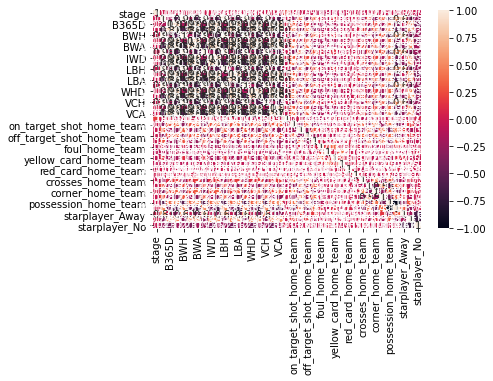

In [187]:
corrMatrix = myEPL.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Correlograms

Text(0.5, 0.9, 'Betting Odds for Home')

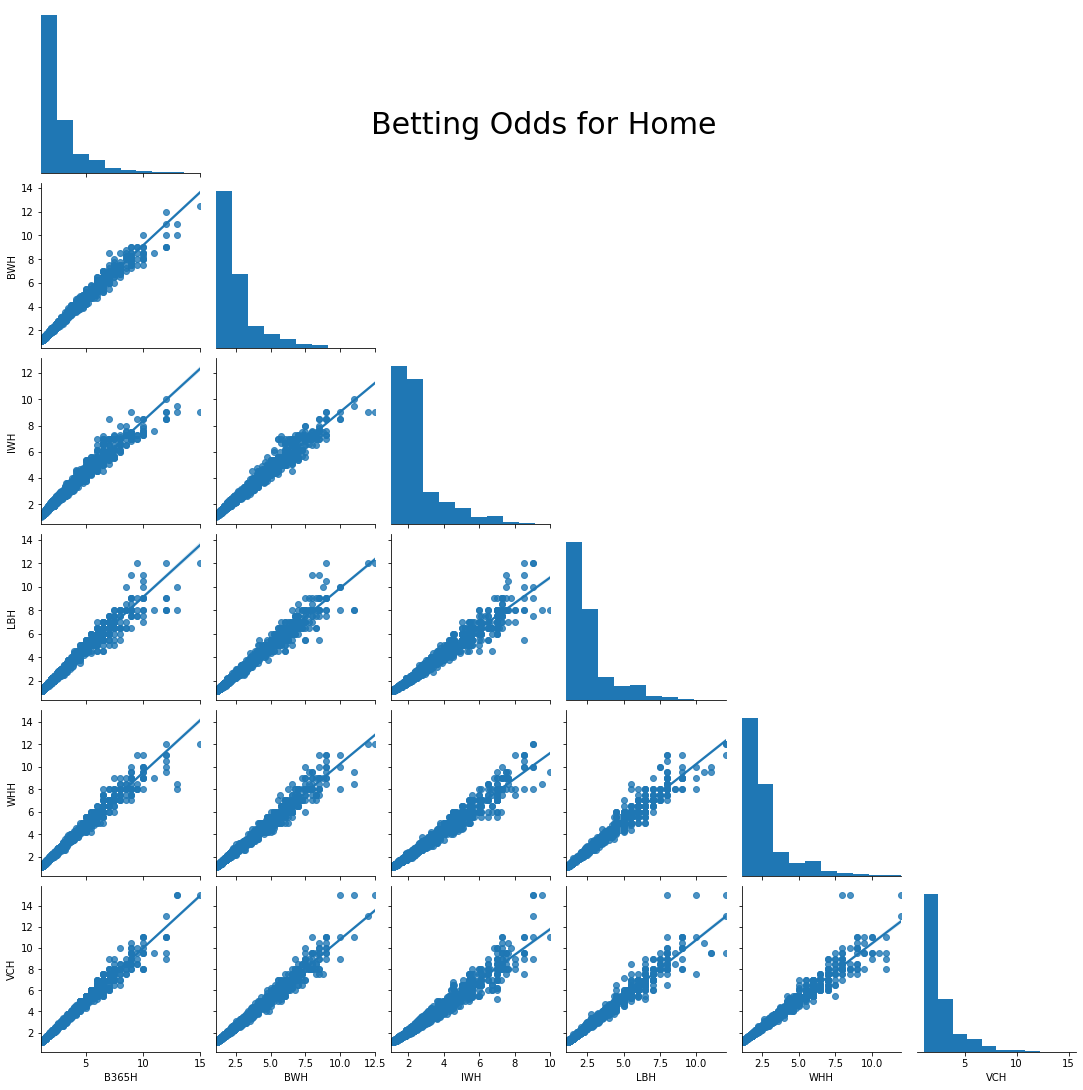

In [188]:
x = sns.pairplot(myEPL[['B365H', 'BWH', 'IWH', 'LBH', 'WHH', 'VCH']], corner=True, kind="reg")
x.fig.suptitle("Betting Odds for Home", y=0.9, fontsize=30)

Text(0.5, 0.9, 'Betting Odds for Draw')

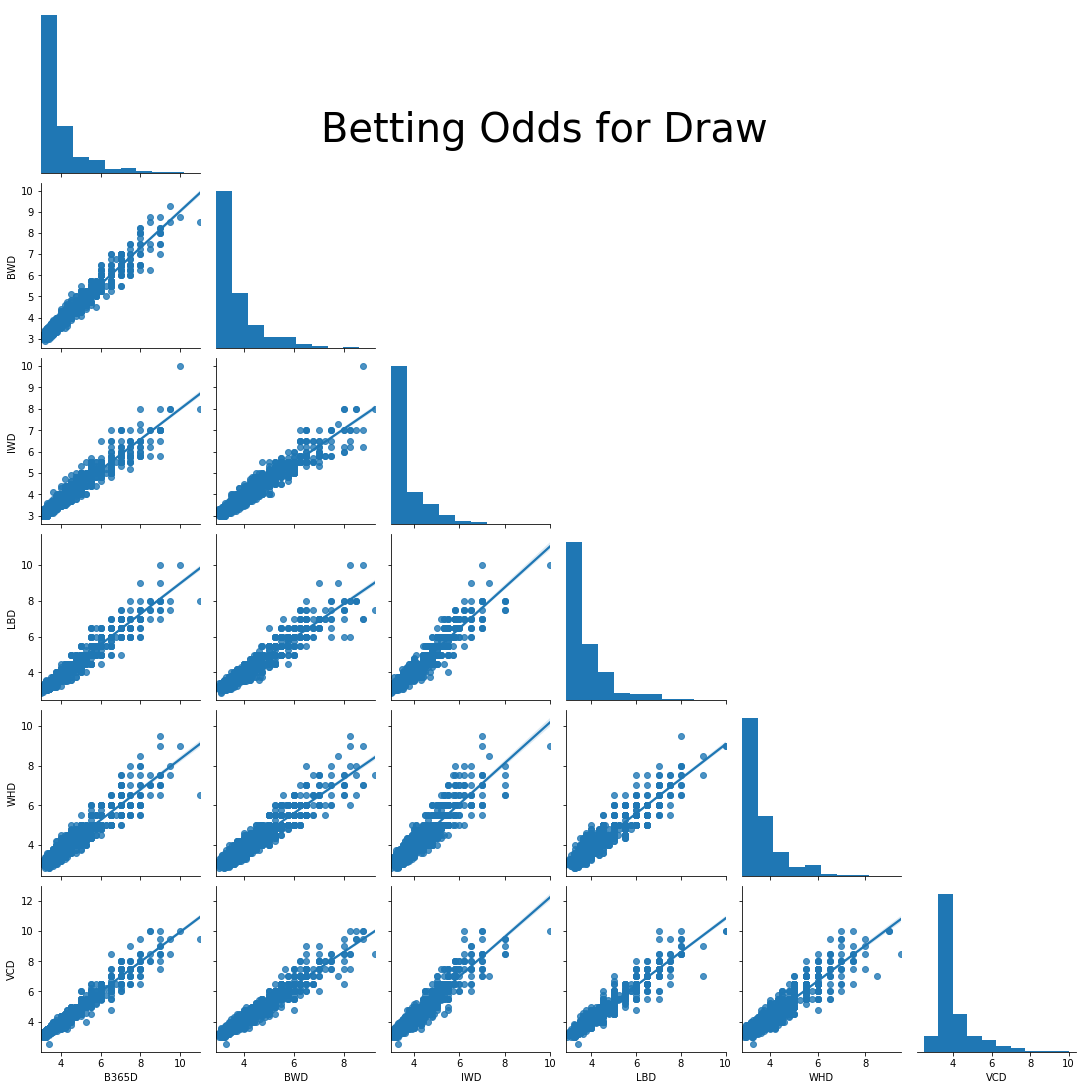

In [189]:
y = sns.pairplot(myEPL[['B365D', 'BWD', 'IWD', 'LBD', 'WHD', 'VCD']], corner=True, kind="reg")
y.fig.suptitle("Betting Odds for Draw", y=0.9, fontsize=40)

Text(0.5, 0.9, 'Betting Odds for Away')

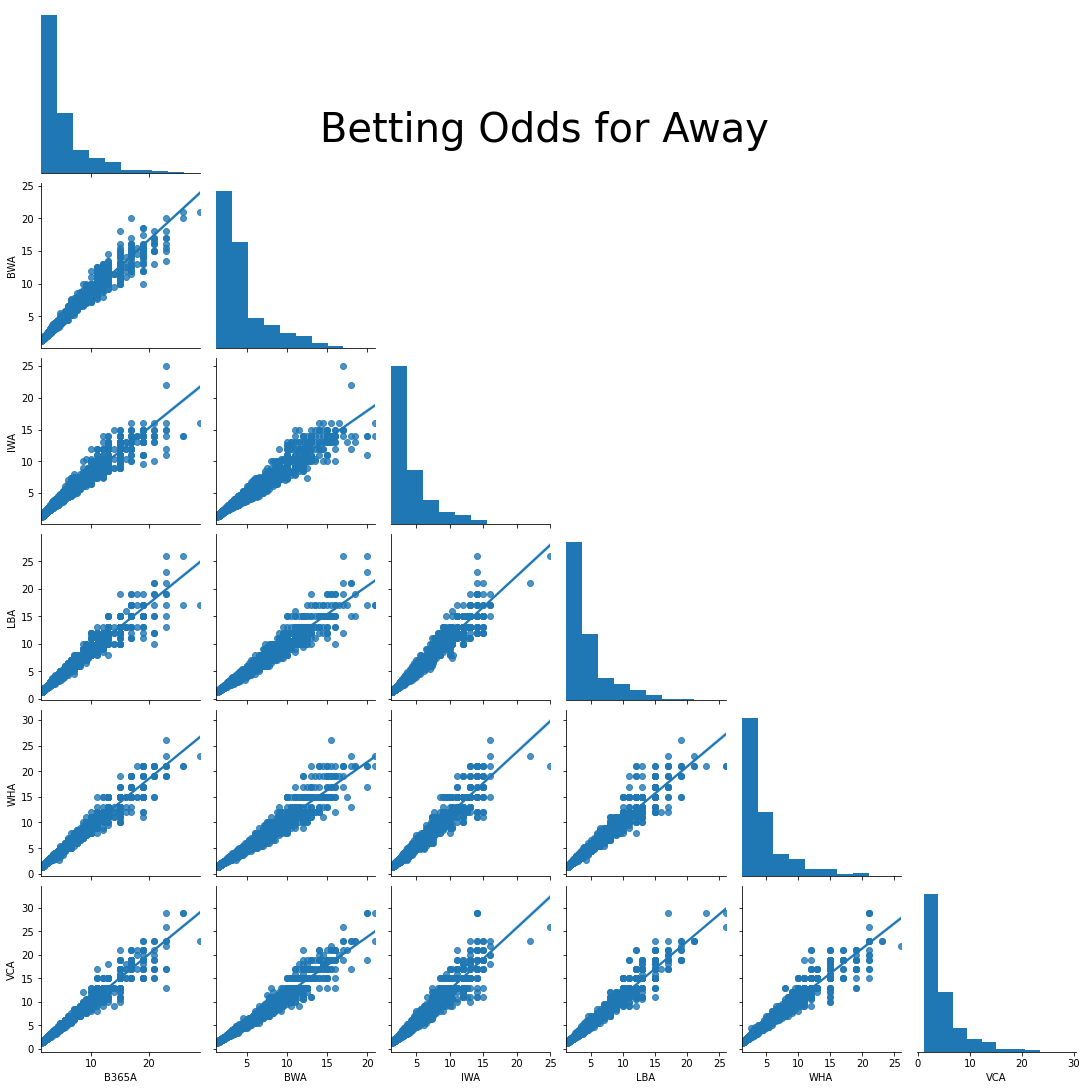

In [190]:
z = sns.pairplot(myEPL[['B365A', 'BWA', 'IWA', 'LBA', 'WHA', 'VCA']], corner=True, kind="reg")
z.fig.suptitle("Betting Odds for Away", y=0.9, fontsize=40)

## Final data

In [191]:
EPLdata = myEPL.drop(['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA'], axis = 1)

In [192]:
EPLdata

,stage,B365H,B365D,B365A,year,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome,starplayer_Away,starplayer_Home,starplayer_No
1728,1,1.29,5.5,11.00,2008,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,Not Win,0,0,1
1729,1,1.20,6.5,15.00,2008,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,Win,0,1,0
1730,1,5.50,3.6,1.67,2008,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,Not Win,1,0,0
1731,1,1.91,3.4,4.20,2008,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,Win,0,0,1
1732,1,1.91,3.4,4.33,2008,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,Win,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,9,1.75,4.0,5.00,2015,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,Not Win,0,0,1
4764,9,2.05,3.4,4.20,2015,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,Not Win,0,0,1
4765,9,2.50,3.5,3.00,2015,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,Not Win,0,0,1
4766,9,6.00,4.2,1.62,2015,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,Not Win,0,0,1


In [193]:
EPLdata.iloc[:,21]

1728    Not Win
1729        Win
1730    Not Win
1731        Win
1732        Win
         ...   
4763    Not Win
4764    Not Win
4765    Not Win
4766    Not Win
4767        Win
Name: home_outcome, Length: 3030, dtype: object

In [194]:
EPLdata['home_outcome'] = EPLdata['home_outcome'].replace(['Win','Not Win'],[0,1])

In [195]:
EPLdata

,stage,B365H,B365D,B365A,year,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome,starplayer_Away,starplayer_Home,starplayer_No
1728,1,1.29,5.5,11.00,2008,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,1,0,0,1
1729,1,1.20,6.5,15.00,2008,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,0,0,1,0
1730,1,5.50,3.6,1.67,2008,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,1,1,0,0
1731,1,1.91,3.4,4.20,2008,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,0,0,0,1
1732,1,1.91,3.4,4.33,2008,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,9,1.75,4.0,5.00,2015,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,1,0,0,1
4764,9,2.05,3.4,4.20,2015,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,1,0,0,1
4765,9,2.50,3.5,3.00,2015,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,1,0,0,1
4766,9,6.00,4.2,1.62,2015,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,1,0,0,1


In [196]:
cop = EPLdata.copy()

In [197]:
cols = list(EPLdata.columns.values)
cop = cop[['home_outcome','stage',
 'B365H',
 'B365D',
 'B365A',
 'year',
 'on_target_shot_home_team',
 'on_target_shot_away_team',
 'off_target_shot_home_team',
 'off_target_shot_away_team',
 'foul_home_team',
 'foul_away_team',
 'yellow_card_home_team',
 'yellow_card_away_team',
 'red_card_home_team',
 'red_card_away_team',
 'crosses_home_team',
 'crosses_away_team',
 'corner_home_team',
 'corner_away_team',
 'possession_home_team',
 'possession_away_team',
 'starplayer_Away',
 'starplayer_Home',
 'starplayer_No']]

In [198]:
p = cop.reset_index()
p = p.drop('index',axis=1)

In [199]:
p.to_csv('noindexweirdtest1.csv', index=False)

In [200]:
last = p.copy()

In [201]:
last = last.drop(['B365A', 'B365H', 'B365D'], axis = 1)

In [202]:
last.to_csv('noindexweirdtest2.csv', index=False)

# PLEASE STOP HERE!!!!!!

# PLEASE STOP HERE!!!!!!

# PLEASE STOP HERE!!!!!!

# PLEASE STOP HERE!!!!!!

In [138]:
EPL_final = p.copy()

In [139]:
EPL_final.columns

Index(['home_outcome', 'stage', 'B365H', 'B365D', 'B365A', 'year',
       'on_target_shot_home_team', 'on_target_shot_away_team',
       'off_target_shot_home_team', 'off_target_shot_away_team',
       'foul_home_team', 'foul_away_team', 'yellow_card_home_team',
       'yellow_card_away_team', 'red_card_home_team', 'red_card_away_team',
       'crosses_home_team', 'crosses_away_team', 'corner_home_team',
       'corner_away_team', 'possession_home_team', 'possession_away_team',
       'starplayer_Away', 'starplayer_Home', 'starplayer_No'],
      dtype='object')

In [143]:
last = p.copy()

In [144]:
last = last.drop(['B365A', 'B365H', 'B365D'], axis = 1)

In [145]:
last.to_csv('noindexweirdtest2.csv', index=False)

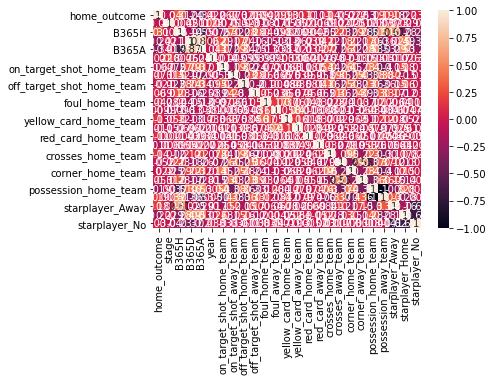

In [134]:
corrMatrix = p.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
cols = list(EPLdata.columns.values)
weirdtest = weirdtest[['home_outcome','stage',
 'B365H',
 'B365D',
 'B365A',
 'year',
 'on_target_shot_home_team',
 'on_target_shot_away_team',
 'off_target_shot_home_team',
 'off_target_shot_away_team',
 'foul_home_team',
 'foul_away_team',
 'yellow_card_home_team',
 'yellow_card_away_team',
 'red_card_home_team',
 'red_card_away_team',
 'crosses_home_team',
 'crosses_away_team',
 'corner_home_team',
 'corner_away_team',
 'possession_home_team',
 'possession_away_team',
 'starplayer_Away',
 'starplayer_Home',
 'starplayer_No']]

In [ ]:
weirdtest = weirdtest[['home_outcome','stage',
 'B365H',
 'B365D',
 'B365A',
 'year',
 'on_target_shot_home_team',
 'on_target_shot_away_team',
 'off_target_shot_home_team',
 'off_target_shot_away_team',
 'foul_home_team',
 'foul_away_team',
 'yellow_card_home_team',
 'yellow_card_away_team',
 'red_card_home_team',
 'red_card_away_team',
 'crosses_home_team',
 'crosses_away_team',
 'corner_home_team',
 'corner_away_team',
 'possession_home_team',
 'possession_away_team',
 'starplayer_Away',
 'starplayer_Home',
 'starplayer_No']]

In [ ]:
p = weirdtest.reset_index()
p.drop('index',axis=1)

In [ ]:
weirdtest.to_csv('noindexweirdtest.csv', index=False)

In [522]:
EPLnew.head(10)

,stage,year,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome,starplayer_Away,starplayer_Home,starplayer_No
1728,1,2008,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,1,0,0,1
1729,1,2008,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,0,0,1,0
1730,1,2008,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,1,1,0,0
1731,1,2008,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,0,0,0,1
1732,1,2008,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,0,0,0,1
1733,1,2008,2,8,7,8,11,11,2,2,0,0,14,21,3,4,51.0,49.0,1,0,0,1
1734,1,2008,7,2,5,5,11,11,1,2,0,0,25,27,7,9,53.0,47.0,0,0,0,1
1735,1,2008,5,1,7,6,14,15,1,2,0,0,22,29,4,3,47.0,53.0,0,0,0,1
1736,1,2008,5,4,5,6,10,9,3,0,0,0,16,14,5,6,53.0,47.0,0,0,0,1
1737,1,2008,6,7,10,5,11,8,0,1,0,0,25,9,8,3,65.0,35.0,0,0,1,0


In [516]:
EPLdata.to_csv('EPLdata.csv')

In [ ]:
['', 'stage', 'B365H', 'B365D', 'B365A', 'year', 'on_target_shot_home_team', 'on_target_shot_away_team', 'off_target_shot_home_team', 'off_target_shot_away_team', 'foul_home_team', 'foul_away_team', 'yellow_card_home_team', 'yellow_card_away_team', 'red_card_home_team', 'red_card_away_team', 'crosses_home_team', 'crosses_away_team', 'corner_home_team', 'corner_away_team', 'possession_home_team', 'possession_away_team', 'home_outcome', 'starplayer_Away', 'starplayer_Home', 'starplayer_No'

In [524]:
EPLdata

,stage,B365H,B365D,B365A,year,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome,starplayer_Away,starplayer_Home,starplayer_No
1728,1,1.29,5.5,11.00,2008,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,1,0,0,1
1729,1,1.20,6.5,15.00,2008,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,0,0,1,0
1730,1,5.50,3.6,1.67,2008,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,1,1,0,0
1731,1,1.91,3.4,4.20,2008,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,0,0,0,1
1732,1,1.91,3.4,4.33,2008,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,9,1.75,4.0,5.00,2015,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,1,0,0,1
4764,9,2.05,3.4,4.20,2015,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,1,0,0,1
4765,9,2.50,3.5,3.00,2015,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,1,0,0,1
4766,9,6.00,4.2,1.62,2015,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,1,0,0,1


In [549]:
weirdtest = EPLdata.copy()

In [ ]:
weirdtest.to_csv('weiredtest.csv')

In [550]:
cols = list(EPLdata.columns.values)

In [551]:
weirdtest = weirdtest[['home_outcome','stage',
 'B365H',
 'B365D',
 'B365A',
 'year',
 'on_target_shot_home_team',
 'on_target_shot_away_team',
 'off_target_shot_home_team',
 'off_target_shot_away_team',
 'foul_home_team',
 'foul_away_team',
 'yellow_card_home_team',
 'yellow_card_away_team',
 'red_card_home_team',
 'red_card_away_team',
 'crosses_home_team',
 'crosses_away_team',
 'corner_home_team',
 'corner_away_team',
 'possession_home_team',
 'possession_away_team',
 'starplayer_Away',
 'starplayer_Home',
 'starplayer_No']]

In [552]:
weirdtest

,home_outcome,stage,B365H,B365D,B365A,year,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,starplayer_Away,starplayer_Home,starplayer_No
1728,1,1,1.29,5.5,11.00,2008,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,0,0,1
1729,0,1,1.20,6.5,15.00,2008,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,0,1,0
1730,1,1,5.50,3.6,1.67,2008,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,1,0,0
1731,0,1,1.91,3.4,4.20,2008,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,0,0,1
1732,0,1,1.91,3.4,4.33,2008,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4763,1,9,1.75,4.0,5.00,2015,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,0,0,1
4764,1,9,2.05,3.4,4.20,2015,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,0,0,1
4765,1,9,2.50,3.5,3.00,2015,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,0,0,1
4766,1,9,6.00,4.2,1.62,2015,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,0,0,1


In [553]:
weirdtest.to_csv('noindexweirdtest.csv', index=False)

In [547]:
p = weirdtest.reset_index()
p.drop('index',axis=1)

,stage,B365H,B365D,B365A,year,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_outcome,starplayer_Away,starplayer_Home,starplayer_No
0,1,1.29,5.5,11.00,2008,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,1,0,0,1
1,1,1.20,6.5,15.00,2008,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,0,0,1,0
2,1,5.50,3.6,1.67,2008,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,1,1,0,0
3,1,1.91,3.4,4.20,2008,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,0,0,0,1
4,1,1.91,3.4,4.33,2008,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,9,1.75,4.0,5.00,2015,3,9,6,10,16,10,2,0,0,0,10,21,6,7,51.0,49.0,1,0,0,1
3026,9,2.05,3.4,4.20,2015,4,2,9,6,6,14,2,2,0,0,19,6,1,2,54.0,46.0,1,0,0,1
3027,9,2.50,3.5,3.00,2015,8,8,5,2,15,11,1,2,0,0,12,10,8,6,49.0,51.0,1,0,0,1
3028,9,6.00,4.2,1.62,2015,4,11,5,4,11,12,2,1,0,0,14,13,3,9,33.0,67.0,1,0,0,1


In [548]:
p.to_csv('weirdtest1.csv')

In [112]:
EPLdata['year'].value_counts()

2012    390
2014    380
2015    378
2011    377
2009    377
2010    373
2013    371
2008    194
2016    190
Name: year, dtype: int64